In [1]:
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
directorio_de_imagenes="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/IMAGENES/MODELOS"
directorios_de_datos="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/DATA"

In [3]:
# Reading data and removing index col
df = pd.read_csv(f"{directorios_de_datos}/DataAnalyst_preprocesado.csv")
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean,Sentences in Job Description
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37.0,66.0,51.5,48
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37.0,66.0,51.5,48
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37.0,66.0,51.5,24
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37.0,66.0,51.5,28
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37.0,66.0,51.5,13


## Variable a predecir

In [10]:
#variable a predecir
y=df[["Salary Estimate Mean"]].to_numpy()


## Variables features
- Job Title
- Company Name
- Location
- Headquarters

In [5]:
features_columnas_categoricas=['Job Title','Company Name','Location','Headquarters']
feature_names = features_columnas_categoricas
#df[feature_names[0:len(feature_names)]+ ["Salary Estimate Mean"]]
X=df[feature_names[0:len(feature_names)]]
X

,Job Title,Company Name,Location,Headquarters
0,"Data Analyst, Center on Immigration and Justic...",Vera Institute of Justice,"New York, NY","New York, NY"
1,Quality Data Analyst,Visiting Nurse Service of New York,"New York, NY","New York, NY"
2,"Senior Data Analyst, Insights & Analytics Team...",Squarespace,"New York, NY","New York, NY"
3,Data Analyst,Celerity,"New York, NY","McLean, VA"
4,Reporting Data Analyst,FanDuel,"New York, NY","New York, NY"
...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,"Avacend, Inc.","Denver, CO","Alpharetta, GA"
2249,Senior Data Analyst (Corporate Audit),Arrow Electronics,"Centennial, CO","Centennial, CO"
2250,"Technical Business Analyst (SQL, Data analytic...",Spiceorb,"Denver, CO","Denver, CO"
2251,"Data Analyst 3, Customer Experience",Contingent Network Services,"Centennial, CO","West Chester, OH"


In [34]:
import umap.umap_ as umap
umap_categorical = umap.UMAP(random_state=42,n_neighbors=250,n_components=2)

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
#features_columnas_categoricas = ["Pclass","Sex","SibSp","Parch","Embarked"]
one_hot_encoder = OneHotEncoder()
# passthrough significa que no modifique las otras columnas
transformer = ColumnTransformer([("one_hot",
                                  one_hot_encoder,
                                  features_columnas_categoricas)],
                                  remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [13]:
transformed_X.nonzero()

(array([   0,    0,    0, ..., 2252, 2252, 2252], dtype=int32),
 array([ 418, 2671, 2928, ..., 2365, 2804, 3088], dtype=int32))

In [35]:
X_reduced=umap_categorical.fit(transformed_X)

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [16]:
from sklearn.model_selection import train_test_split

In [36]:
# Revisar si se necesita estratificar alguna columna  stratify=
# Split trian (find parameters to minimize the cost function) and test 20 % 

#X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = .2, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X_reduced.embedding_, y, test_size = .2, random_state = 42)


In [37]:
X_train.shape

(1802, 2)

In [38]:
X_test.shape

(451, 2)

In [23]:
from sklearn.linear_model import SGDRegressor

In [24]:
modelo = SGDRegressor()

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
SGDRegressor?

Init signature:
SGDRegressor(
    loss='squared_error',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,
)
Docstring:     
Linear model fitted by minimizing a regularized empirical loss with SGD.

SGD stands for Stochastic Gradient Descent: the gradient of the loss is
estimated each sample at a time and the model is updated along the way with
a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
parameter update crosses the 0.0 value because of

In [27]:
parameters = {
    'alpha':[0.0001, 0.001,0.01,0.1],
    'penalty' :['l1','l2'],
    'max_iter':[1000,10000,20000]}



In [28]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [39]:
gridsearch = GridSearchCV(estimator=modelo, param_grid = parameters, n_jobs=-1)
gridsearch.fit(X_train, y_train.reshape(-1))

GridSearchCV(estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'max_iter': [1000, 10000, 20000],
                         'penalty': ['l1', 'l2']})

In [40]:
gridsearch.cv_results_

{'mean_fit_time': array([0.01166892, 0.00783811, 0.00526257, 0.00578308, 0.00550566,
        0.0074008 , 0.00813637, 0.00542531, 0.00892081, 0.0050673 ,
        0.00711393, 0.00497346, 0.00772233, 0.00734453, 0.00867028,
        0.0058907 , 0.00945506, 0.00744834, 0.00480528, 0.00691705,
        0.00897579, 0.00619545, 0.00458493, 0.00410333]),
 'std_fit_time': array([0.00559476, 0.00583325, 0.0019929 , 0.00259091, 0.0019863 ,
        0.00312401, 0.00173313, 0.00147178, 0.00262754, 0.00140007,
        0.00324892, 0.00199252, 0.00391648, 0.00370883, 0.00175433,
        0.00174712, 0.00334859, 0.00275977, 0.00179475, 0.00372072,
        0.00289288, 0.00327865, 0.00051095, 0.0018655 ]),
 'mean_score_time': array([0.00096207, 0.0006094 , 0.00042768, 0.00038795, 0.00040817,
        0.00035205, 0.00035634, 0.00034246, 0.00035677, 0.00032315,
        0.00062518, 0.00053363, 0.00084176, 0.00034909, 0.00069008,
        0.00050669, 0.00087872, 0.00059261, 0.00026774, 0.00041718,
        0.000461

In [41]:
gridsearch.best_params_

{'alpha': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

In [42]:
def getParam(params:dict,paramName:str):
    return params[paramName]

In [43]:
model_regresion=SGDRegressor(alpha=getParam(gridsearch.best_params_,'alpha'),max_iter=getParam(gridsearch.best_params_,'max_iter'),penalty=getParam(gridsearch.best_params_,'penalty'))
model_regresion

SGDRegressor(alpha=0.01)

In [44]:
model_regresion.fit(X_train,y_train.reshape(-1))

SGDRegressor(alpha=0.01)

In [45]:
y_train_predict=model_regresion.predict(X_train)

In [46]:
y_predict=model_regresion.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [48]:
def getMetrics(y_true,y_preds):
    metric_results=dict()
    mse=mean_squared_error(y_true, y_preds)
    metric_results["mse"]=mse
    rmse=root_mean_squared_error(y_true, y_preds)
    metric_results["rmse"]=rmse
    msa=mean_absolute_error(y_true, y_preds)
    metric_results["msa"]=msa
    r2_s=r2_score(y_true, y_preds)
    metric_results["r2"]=r2_s

    return metric_results

def printMetrics(model_name,y_true,y_preds):
    metric_results=getMetrics(y_true,y_preds)
    print(f"showing metrics of {model_name}:")
    for key  in metric_results:
        print(f"{key}: {metric_results[key]}")
    print("\n")
    return metric_results

def pretyMetricString(metrics:dict):
    return "mse:%.3f rmse:%.3f msa:%.3f r2:%.3f" % (
        float(metrics["mse"].round(3)),
        float(metrics["rmse"].round(3)),
        float(metrics["msa"].round(3)),
        float(metrics["r2"].round(3)))

In [49]:
linear_regresion_metrics_train=printMetrics("Linear regresion SKLearn",y_train.reshape(-1),y_train_predict)

showing metrics of Linear regresion SKLearn:
mse: 1.671942390755009e+16
rmse: 129303611.34767307
msa: 117596303.30768487
r2: -30792609377385.35




In [50]:
linear_regresion_metrics=printMetrics("Linear regresion SKLearn",y_test.reshape(-1),y_predict)


showing metrics of Linear regresion SKLearn:
mse: 1.5852607683587824e+16
rmse: 125907139.12875561
msa: 115327448.87324554
r2: -25968874663174.727




# Grafica de y_test vs y_predicted


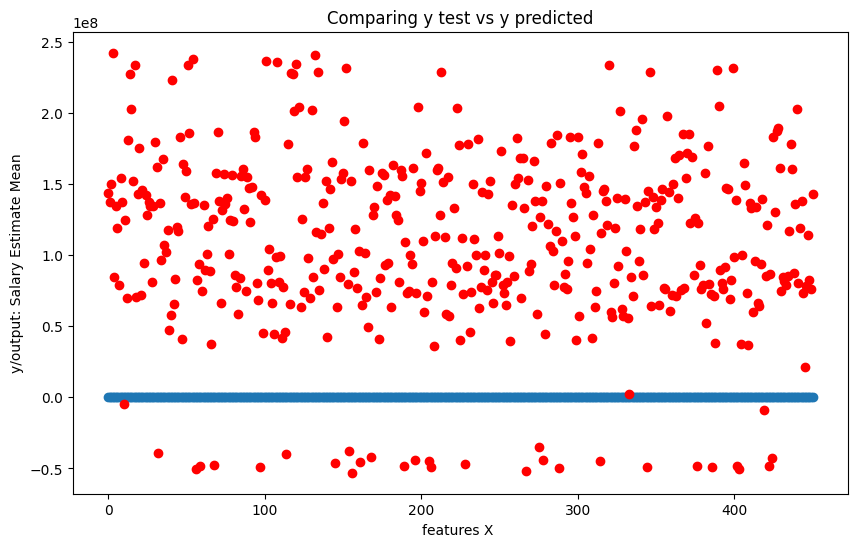

In [51]:
y_test_reshaped=y_test.reshape(-1)
x_cord=np.arange(0,len(y_test_reshaped),1)
plt.figure(figsize=(10,6))
plt.scatter(x_cord, y_test_reshaped, label = "Data points test")
plt.scatter(x_cord, y_predict, label = "Data points test",c= 'r')
plt.xlabel("features X ")
plt.ylabel(f"y/output: Salary Estimate Mean")
plt.title("Comparing y test vs y predicted")
save_image_file="regresion_model"
plt.savefig(f"{directorio_de_imagenes}/{save_image_file}.jpg", dpi=300, transparent=False, bbox_inches='tight')
plt.show()

DecisionTreeRegressor
https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [143]:
params = {
    'criterion': ['squared_error',  'poisson'],
    'max_depth': list(range(1, 10)),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': list(range(1, 10,2)),
}

tree_reg = DecisionTreeRegressor(random_state = 42)
gridsearch_tree_reg = GridSearchCV(tree_reg, params, verbose = 1, cv = 10,n_jobs=-1)

In [144]:

gridsearch_tree_reg.fit(X_train, y_train.reshape(-1))

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [145]:
gridsearch_tree_reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [146]:
tree_reg = DecisionTreeRegressor(
    criterion=getParam(gridsearch_tree_reg.best_params_,'criterion'),
    max_depth=getParam(gridsearch_tree_reg.best_params_,'max_depth'),
    min_samples_leaf=getParam(gridsearch_tree_reg.best_params_,'min_samples_leaf'),
    min_samples_split=getParam(gridsearch_tree_reg.best_params_,'min_samples_split'),
    )

In [147]:
tree_reg.fit(X_train,y_train.reshape(-1))

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5)

In [148]:
y_train_predict=tree_reg.predict(X_train)

In [149]:
y_test_predict=tree_reg.predict(X_test)

In [150]:
tree_regression_metrics=printMetrics("Linear regresion SKLearn",y_train.reshape(-1),y_train_predict)

showing metrics of Linear regresion SKLearn:
mse: 396.9150253270054
rmse: 19.922726352761195
msa: 15.042023871237395
r2: 0.2689910012156158




In [151]:
tree_regression_metrics=printMetrics("Linear regresion SKLearn",y_test.reshape(-1),y_test_predict)

showing metrics of Linear regresion SKLearn:
mse: 471.90713047100326
rmse: 21.723423543976747
msa: 16.229258972554646
r2: 0.22694755535091737




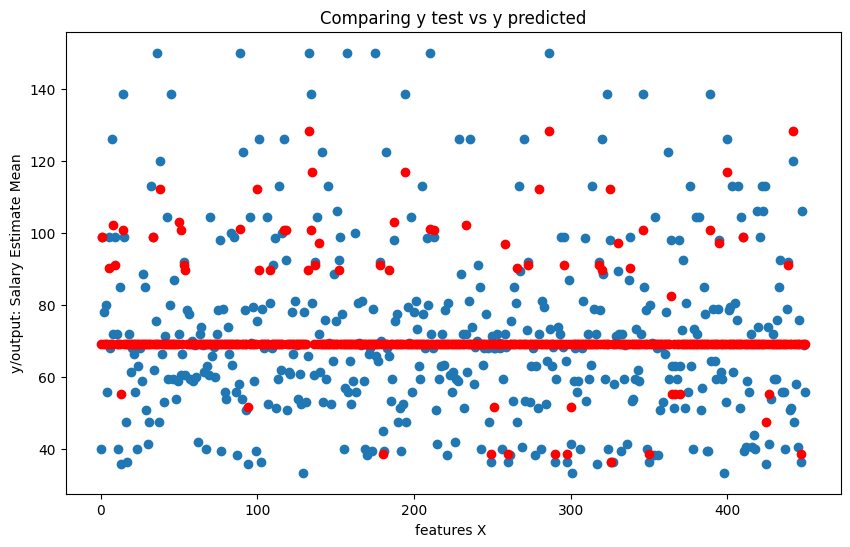

In [152]:
y_test_reshaped=y_test.reshape(-1)
x_cord=np.arange(0,len(y_test_reshaped),1)
plt.figure(figsize=(10,6))
plt.scatter(x_cord, y_test_reshaped, label = "Data points test")
plt.scatter(x_cord, y_test_predict, label = "Data points test",c= 'r')
plt.xlabel("features X ")
plt.ylabel(f"y/output: Salary Estimate Mean")
plt.title("Comparing y test vs y predicted")
save_image_file="regresion_tree_model"
#plt.savefig(f"{directorio_de_imagenes}/{save_image_file}.jpg", dpi=300, transparent=False, bbox_inches='tight')
plt.show()

# Random forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor

In [153]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
params = {
    'criterion': ['squared_error',  'poisson'],
    'n_estimators' : [1,2,3,4,5],
    'max_depth': list(range(1, 10,2)),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': list(range(1, 4)),
}

random_forest_reg = RandomForestRegressor(random_state = 42)
gridsearch_rf_reg = GridSearchCV(random_forest_reg, params, verbose = 1, cv = 10,n_jobs=-1)

In [157]:
gridsearch_rf_reg.fit(X_train, y_train.reshape(-1))

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1, 2, 3, 4, 5]},
             verbose=1)

In [158]:
gridsearch_rf_reg.best_params_

{'criterion': 'poisson',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 5}

In [159]:
random_forest_reg = RandomForestRegressor(
    criterion=getParam(gridsearch_rf_reg.best_params_,'criterion'),
    n_estimators=getParam(gridsearch_rf_reg.best_params_,'n_estimators'),
    max_depth=getParam(gridsearch_rf_reg.best_params_,'max_depth'),
    min_samples_split=getParam(gridsearch_rf_reg.best_params_,'min_samples_split'),
    min_samples_leaf=getParam(gridsearch_rf_reg.best_params_,'min_samples_leaf')
    )

In [160]:
random_forest_reg.fit(X_train,y_train.reshape(-1))

RandomForestRegressor(criterion='poisson', max_depth=9, min_samples_leaf=3,
                      n_estimators=5)

In [161]:
y_train_predict=random_forest_reg.predict(X_train)

In [162]:
y_test_predict=random_forest_reg.predict(X_test)

In [163]:
random_forest_regression_metrics=printMetrics("Linear regresion SKLearn",y_train.reshape(-1),y_train_predict)

showing metrics of Linear regresion SKLearn:
mse: 391.78644672282337
rmse: 19.79359610386206
msa: 14.951354046010662
r2: 0.27843644135117485




In [164]:
random_forest_regression_metrics=printMetrics("Linear regresion SKLearn",y_test.reshape(-1),y_test_predict)

showing metrics of Linear regresion SKLearn:
mse: 461.99770275442324
rmse: 21.494131821369834
msa: 16.070557575023074
r2: 0.2431806377239888




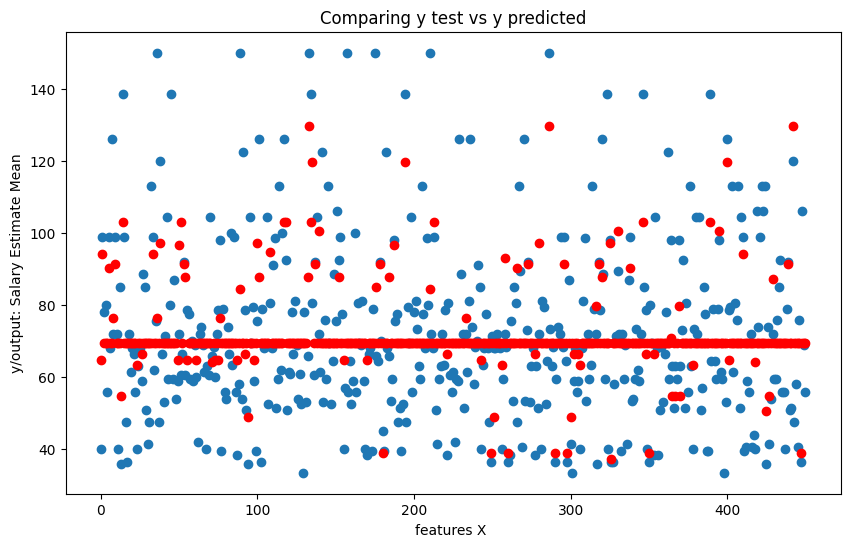

In [165]:
y_test_reshaped=y_test.reshape(-1)
x_cord=np.arange(0,len(y_test_reshaped),1)
plt.figure(figsize=(10,6))
plt.scatter(x_cord, y_test_reshaped, label = "Data points test")
plt.scatter(x_cord, y_test_predict, label = "Data points test",c= 'r')
plt.xlabel("features X ")
plt.ylabel(f"y/output: Salary Estimate Mean")
plt.title("Comparing y test vs y predicted")
save_image_file="regresion_tree_model"
#plt.savefig(f"{directorio_de_imagenes}/{save_image_file}.jpg", dpi=300, transparent=False, bbox_inches='tight')
plt.show()

https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [166]:
from sklearn.ensemble import AdaBoostRegressor

In [173]:
params = {
    'n_estimators' : list(range(3, 10)),
    'learning_rate': [0.001,0.01, 0.1],
    'loss': ['linear', 'square', 'exponential'],
}

adaBoost_reg = AdaBoostRegressor(random_state = 42)
adaBoost_grid_reg = GridSearchCV(adaBoost_reg, params, verbose = 1, cv = 10,n_jobs=-1)

In [174]:
adaBoost_grid_reg.fit(X_train, y_train.reshape(-1))

Fitting 10 folds for each of 63 candidates, totalling 630 fits


GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [3, 4, 5, 6, 7, 8, 9]},
             verbose=1)

In [175]:
adaBoost_grid_reg.best_params_

{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 4}

In [176]:
adaBoost_reg = AdaBoostRegressor(
    learning_rate=getParam(adaBoost_grid_reg.best_params_,'learning_rate'),
    loss=getParam(adaBoost_grid_reg.best_params_,'loss'),
    n_estimators=getParam(adaBoost_grid_reg.best_params_,'n_estimators'),
    )

In [178]:
adaBoost_reg.fit(X_train,y_train.reshape(-1))

AdaBoostRegressor(learning_rate=0.01, loss='square', n_estimators=4)

In [179]:
y_train_predict=adaBoost_reg.predict(X_train)

In [180]:
y_test_predict=adaBoost_reg.predict(X_test)

In [181]:
adaBoost_regression_metrics=printMetrics("Linear regresion SKLearn",y_train.reshape(-1),y_train_predict)

showing metrics of Linear regresion SKLearn:
mse: 456.74829368812175
rmse: 21.3716703532532
msa: 16.340002773985454
r2: 0.15879447347615283




In [182]:
adaBoost_regression_metrics=printMetrics("Linear regresion SKLearn",y_test.reshape(-1),y_test_predict)

showing metrics of Linear regresion SKLearn:
mse: 525.2152288261439
rmse: 22.91757467155161
msa: 17.68008448337668
r2: 0.1396211449364272




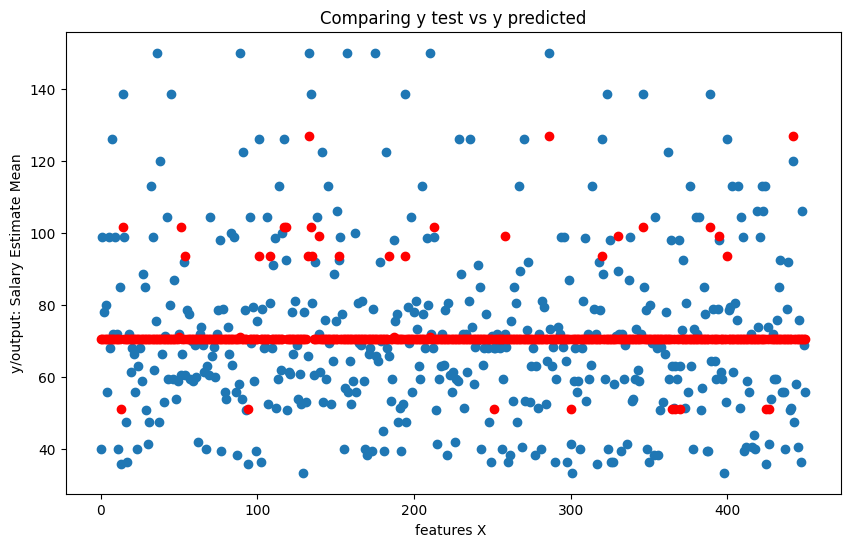

In [183]:
y_test_reshaped=y_test.reshape(-1)
x_cord=np.arange(0,len(y_test_reshaped),1)
plt.figure(figsize=(10,6))
plt.scatter(x_cord, y_test_reshaped, label = "Data points test")
plt.scatter(x_cord, y_test_predict, label = "Data points test",c= 'r')
plt.xlabel("features X ")
plt.ylabel(f"y/output: Salary Estimate Mean")
plt.title("Comparing y test vs y predicted")
save_image_file="regresion_tree_model"
#plt.savefig(f"{directorio_de_imagenes}/{save_image_file}.jpg", dpi=300, transparent=False, bbox_inches='tight')
plt.show()

# NO SUPERVISADO

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [194]:
vectorizer = TfidfVectorizer(stop_words='english')

In [208]:
X = vectorizer.fit_transform(df)

In [211]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

KMeans(max_iter=1000, n_clusters=3, n_init=1)

In [212]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 rating
 type
 max
 description
 estimate
 founded
 headquarters
 industry
 job
 location
Cluster 1:
 estimate
 salary
 company
 location
 size
 sector
 revenue
 founded
 headquarters
 industry
Cluster 2:
 job
 title
 description
 sentences
 type
 max
 estimate
 founded
 headquarters
 industry


Prediction


In [216]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Salary Estimate Min', 'Salary Estimate Max',
       'Salary Estimate Mean', 'Sentences in Job Description'],
      dtype='object')

In [238]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean,Sentences in Job Description
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37.0,66.0,51.5,48
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37.0,66.0,51.5,48
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37.0,66.0,51.5,24
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37.0,66.0,51.5,28
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37.0,66.0,51.5,13


In [270]:

features_columnas_categoricas = ['Job Title','Company Name','Location','Headquarters','Size','Founded','Type of ownership','Industry','Sector','Revenue']
variables_numericas = ['Salary Estimate Max','Sentences in Job Description']
all_vars_kmeans= features_columnas_categoricas + variables_numericas
X_Kmeans = df[all_vars_kmeans[0:len(all_vars_kmeans)]]
one_hot_encoder = OneHotEncoder()
# passthrough significa que no modifique las otras columnas
transformer_Kmeans = ColumnTransformer([("one_hot",
                                  one_hot_encoder,
                                  features_columnas_categoricas)],
                                  remainder='passthrough')

transformed_Kmeans_X = transformer_Kmeans.fit_transform(X_Kmeans)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(transformed_Kmeans_X, y, test_size = .2, random_state = 42)

In [308]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [311]:
pca_2D = PCA(2)
umap_2D = umap.UMAP(random_state=42,n_components=2)
tnse_2D = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3,random_state=42)


In [312]:
pca_3D = PCA(3)
umap_3D = umap.UMAP(random_state=42,n_components=3)
tnse_3D = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=3,random_state=42)

In [327]:
X_reduced_PCA_2D =pca_2D.fit_transform(transformed_Kmeans_X)
X_reduced_UMAP_2D = umap_2D.fit_transform(transformed_Kmeans_X)
X_reduced_tnse_2D = tnse_2D.fit_transform(transformed_Kmeans_X)

In [317]:
X_reduced_PCA_3D =pca_3D.fit_transform(transformed_Kmeans_X)
X_embedded_UMAP_3D = umap_3D.fit_transform(transformed_Kmeans_X)
X_embedded_tnse_3D = tnse_3D.fit_transform(transformed_Kmeans_X)

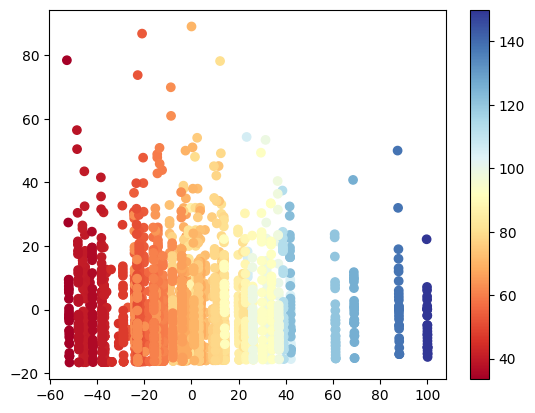

In [318]:
plt.scatter(X_reduced_PCA_2D[:, 0], X_reduced_PCA_2D[:, 1], c=df["Salary Estimate Mean"].tolist(), cmap= "RdYlBu")
plt.colorbar()

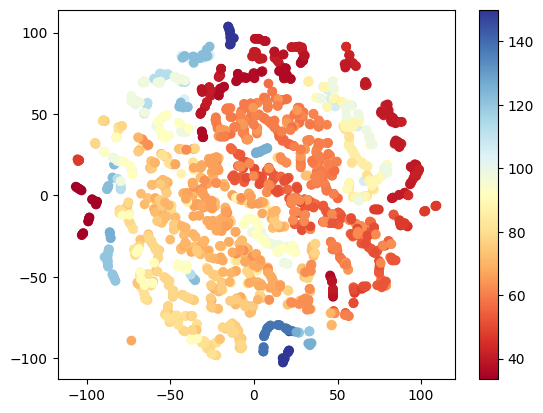

In [329]:
plt.scatter(X_reduced_tnse_2D [:, 0], X_reduced_tnse_2D[:, 1], c=df["Salary Estimate Mean"].tolist(), cmap= "RdYlBu")
plt.colorbar()

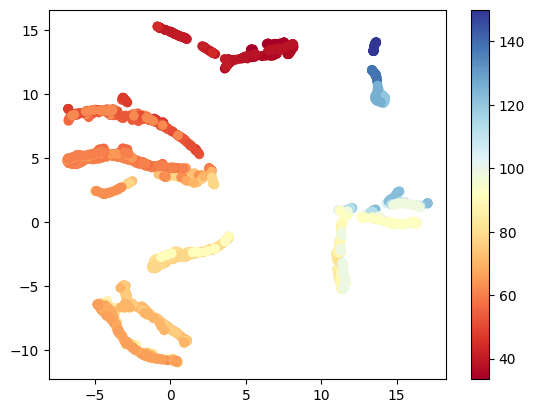

In [330]:
plt.scatter(X_reduced_UMAP_2D[:, 0], X_reduced_UMAP_2D[:, 1], c=df["Salary Estimate Mean"].tolist(), cmap= "RdYlBu")
plt.colorbar()

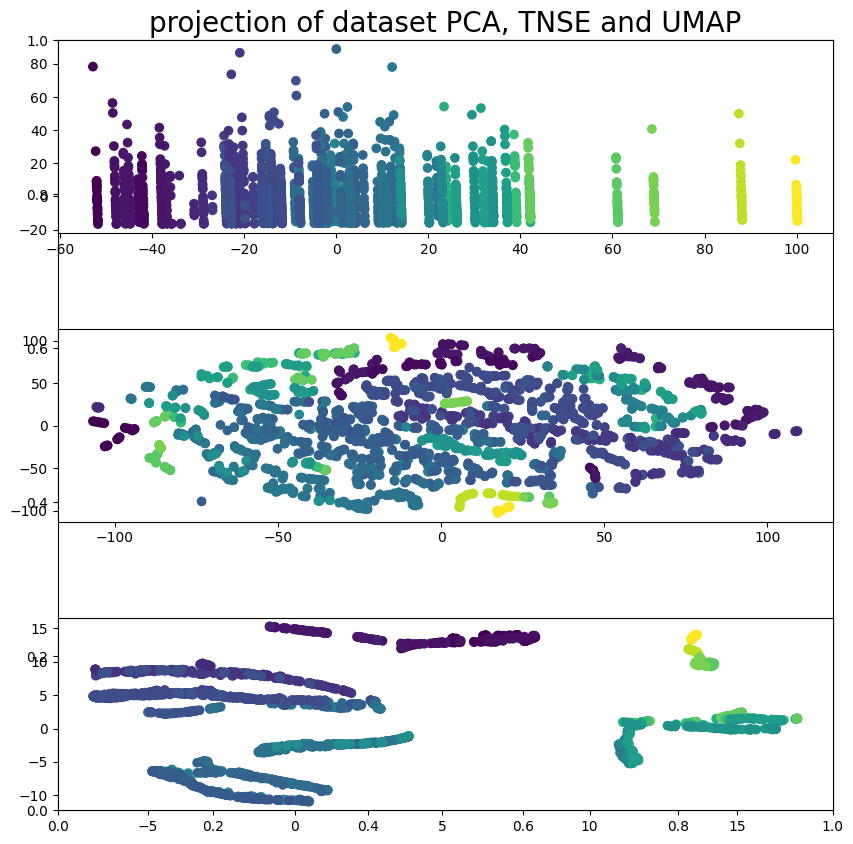

In [328]:
color_list=df["Salary Estimate Mean"].tolist()
plt.figure(figsize=(10,10))
plt.title('projection of dataset PCA, TNSE and UMAP', fontsize=20)
plt.subplots_adjust(hspace=0.5)
plt.subplot(3,1,1)
plt.scatter(X_reduced_PCA_2D[:, 0], X_reduced_PCA_2D[:, 1],  c=color_list)

plt.subplot(3,1,2)

plt.scatter(X_reduced_tnse_2D[:, 0], X_reduced_tnse_2D[:, 1],  c=color_list)


plt.subplot(3,1,3)


plt.scatter(
    X_reduced_UMAP_2D[:, 0],
    X_reduced_UMAP_2D[:, 1],
    c=color_list)




Text(0.5, 0.92, 'projection of dataset with PCA')

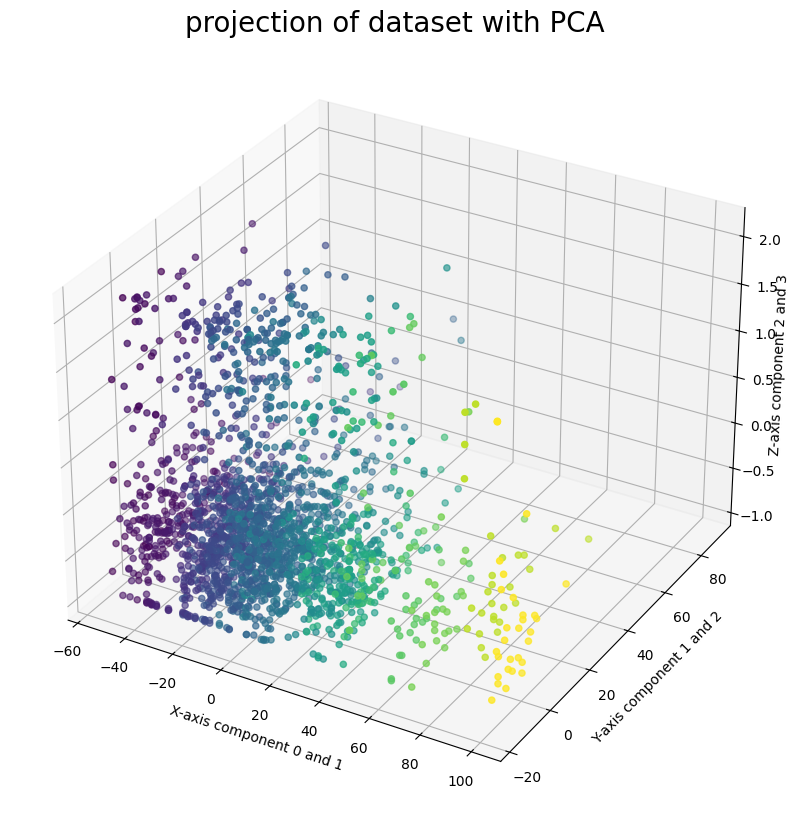

In [331]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Generate the values
x_vals = X_reduced_PCA_3D[:, 0:1]
y_vals = X_reduced_PCA_3D[:, 1:2]
z_vals = X_reduced_PCA_3D[:, 2:3]

ax.scatter3D(x_vals, y_vals, z_vals,c=df["Salary Estimate Mean"].tolist())

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7
ax.set_title('projection of dataset with PCA', fontsize=20)




Text(0.5, 0.92, 'projection of dataset with TSNE')

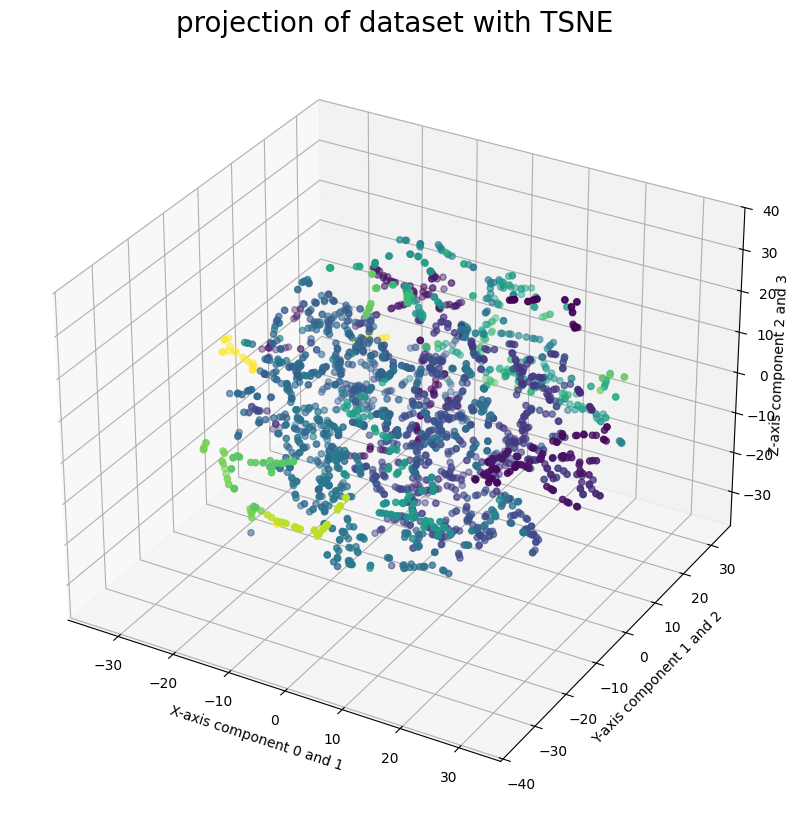

In [334]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Generate the values
x_vals = X_embedded_tnse_3D[:, 0:1]
y_vals = X_embedded_tnse_3D[:, 1:2]
z_vals = X_embedded_tnse_3D[:, 2:3]

ax.scatter3D(x_vals, y_vals, z_vals,c=df["Salary Estimate Mean"].tolist())

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7
ax.set_title('projection of dataset with TSNE', fontsize=20)

Text(0.5, 0.92, 'projection of dataset with UMAP')

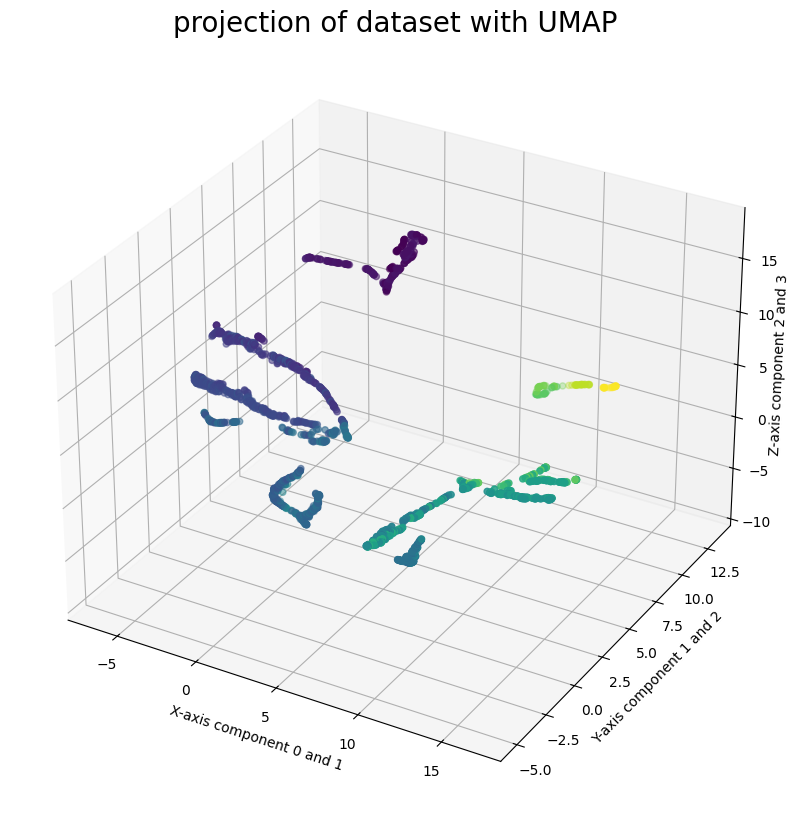

In [333]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Generate the values
x_vals = X_embedded_UMAP_3D[:, 0:1]
y_vals = X_embedded_UMAP_3D[:, 1:2]
z_vals = X_embedded_UMAP_3D[:, 2:3]

ax.scatter3D(x_vals, y_vals, z_vals,c=df["Salary Estimate Mean"].tolist())

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7
ax.set_title('projection of dataset with UMAP', fontsize=20)

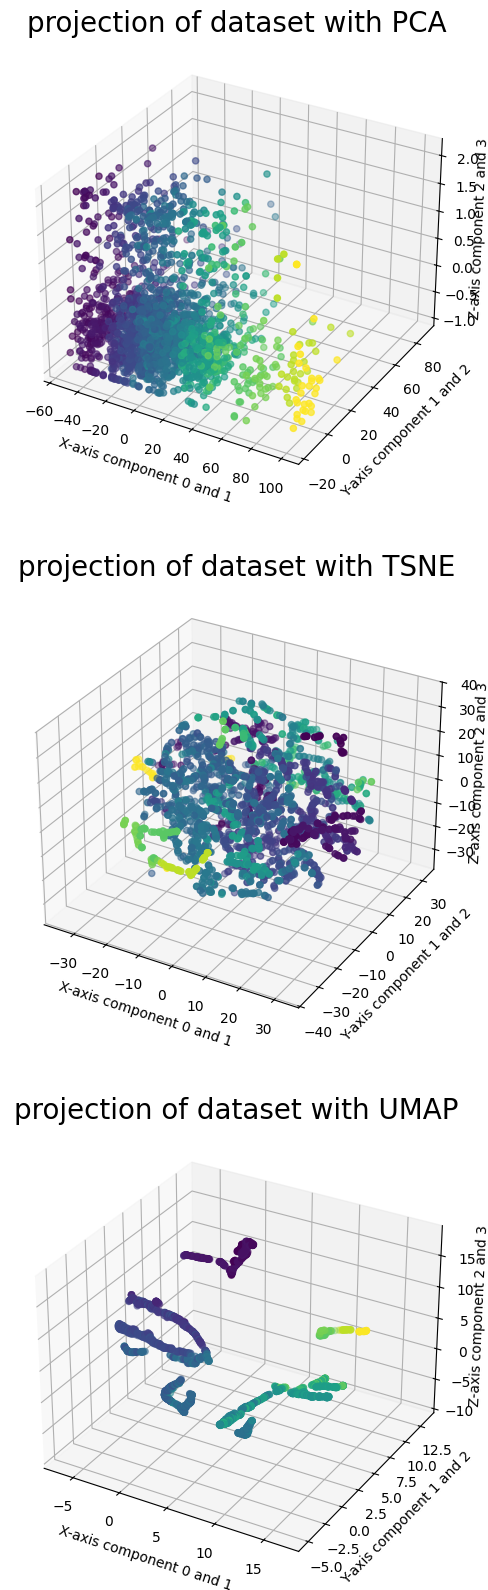

In [325]:

color_list=df["Salary Estimate Mean"].tolist()
#plt.title('projection of the Penguin dataset 3D', fontsize=20)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(3, 1, 1, projection='3d')
x_vals = X_reduced_PCA_3D[:, 0:1]
y_vals = X_reduced_PCA_3D[:, 1:2]
z_vals = X_reduced_PCA_3D[:, 2:3]
ax.scatter3D(x_vals, y_vals, z_vals,c=color_list)
ax.set_title('projection of dataset with PCA', fontsize=20)

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

ax = fig.add_subplot(3, 1, 2, projection='3d')

x_vals = X_embedded_tnse_3D[:, 0:1]
y_vals = X_embedded_tnse_3D[:, 1:2]
z_vals = X_embedded_tnse_3D[:, 2:3]
ax.scatter3D(x_vals, y_vals, z_vals,c=color_list)
ax.set_title('projection of dataset with TSNE', fontsize=20)

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7

ax = fig.add_subplot(3, 1, 3, projection='3d')
x_vals = X_embedded_UMAP_3D[:, 0:1]
y_vals = X_embedded_UMAP_3D[:, 1:2]
z_vals = X_embedded_UMAP_3D[:, 2:3]


ax.scatter3D(x_vals, y_vals, z_vals,c=color_list)
ax.set_title('projection of dataset with UMAP', fontsize=20)

ax.set_xlabel('X-axis component 0 and 1')
ax.set_ylabel('Y-axis component 1 and 2')
ax.set_zlabel('Z-axis component 2 and 3')
ax.zaxis.labelpad=-2.7